In [1]:
from sklearn import datasets
import numpy as np

# 붓꽃 데이터 로드
iris = datasets.load_iris()

# 꽃잎길이, 꽃잎너비 특성을 x에 할당
x = iris.data[:, [2, 3]]
# 꽃 품종에 해당하는 클래스 레이블을 y에 할당
y = iris.target

# 0: Iris-setosa, 1: Iris-versicolor, 2: Iris-virginica
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

# train_test_split을 사용해서 x, y 배열을 랜덤하게 나눈다.
# test_size=0.3 => 30%를 테스트 셋으로 사용
# random_state=1 => 고정된 랜덤 시드로 실행 결과를 재현할 수 있게함
# stratify=y => 훈련 세트와 테스트 세트의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만드는 계층화 기능을 사용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [3]:
from sklearn.preprocessing import StandardScaler

# 특성 표준화(스케일 조정)을 위해서 StandardScaler 클래스를 사용
sc = StandardScaler()
# fit 함수는 각 특성의 차원마다 평균과 표준편차를 계산한다.
sc.fit(x_train)
# transform 함수는 평균과 표준편차를 사용해서 특성을 표준화한다.
x_train_std = sc.transform(x_train)
# 테스트 세트도 같은 비율로 이동(표준화)되도록 같은 평균과 표준편차를 사용한다.
x_test_std = sc.transform(x_test)

In [4]:
from sklearn.linear_model import Perceptron

# 퍼셉트론 모델 훈련
# 사이킷런 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용하여 다중 분류(multiclass classification)을 지원 

# max_iter => 훈련 세트를 반복할 에포크 횟수
# eta0 => 학습률(learning_rate)
# tol => ???
# random_state => 에포크마다 훈련 세트를 섞은 결과가 나중에 그대로 재현될 수 있도록 1로 설정
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(x_train_std, y_train)

# predict 함수를 사용해서 예측을 만든다.
y_pred = ppn.predict(x_test_std)

# y_test => 진짜 클래스 레이블, y_pred => 앞에서 예측한 클래스 레이블 
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

# 45개 샘플에서 1개를 오분류 했으므로 오차는 2.2%

잘못 분류된 샘플 개수: 1


In [5]:
from sklearn.metrics import accuracy_score

# 분류 정확도는 accuracy_score 함수를 사용해서 구할 수 있다.
print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.98


In [6]:
# 다음과 같이 predict와 accuracy_score를 한번에 해줄 수도 있다.
print('정확도: %.2f' % ppn.score(x_test_std, y_test))

정확도: 0.98


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 결정 경계를 그리는 함수
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # 분류할 클래스 개수를 구한다.
    class_count = len(np.unique(y)) # 3개
    # ['red', 'blue', 'lightgreen'] 세개로 컬러맵 생성
    color_map = ListedColormap(colors[:class_count])

    x_min = x[:, 0].min() - 1
    x_max = x[:, 0].max() + 1
    y_min = x[:, 1].min() - 1
    y_max = x[:, 1].max() + 1
    
    # meshgrid 함수는 축에 해당하는 1차원 배열을 받아서 벡터 공간의 모든 좌표를 담은 행렬을 반환한다.
    # 예를들어 x1, x2 = np.meshgrid([0,1],[2,3])이면, (0,2),(1,2),(0,3),(1,3) 네개 점에 대한 
    # x축 값 x1 = [[0,1][0,1]], y축 값 y1 = [[2,2][3,3]]를 반환
    xx, yy = np.meshgrid(
        # arange 함수는 min부터 max까지 resolution만큼씩 커지는 모든 값을 배열로 반환한다.
        np.arange(x_min, x_max, resolution),
        np.arange(y_min, y_max, resolution)
    )
    
    # ravel 함수는 입력된 배열을 1차원으로 펼친다.
    # T는 행렬을 전치해서 두 개의 열이 되도록 바꾼다. 이 두 열이 xy 평면의 좌표값이 된다. 
    z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    # reshape 함수는 행렬의 크기를 입력받은 shape과 동일하게 바꿔준다.
    z = z.reshape(xx.shape)
    
    # contourf 함수로 등고선 그래프를 그린다.
    plt.contourf(
        xx, yy, 
        z, 
        alpha=0.3,          # 산점도의 점 색깔과 구분되어지게 색상을 투명도 조정함 
        cmap=color_map      # 등고선으로 그린 경계 내부를 색칠한다.
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        # scatter 함수로 산점도를 그린다. 루프를 돌아서 클래스별로 다른 색과 모양으로 그린다.
        plt.scatter(
            x=x[y == c1, 0], 
            y=x[y == c1, 1],
            alpha=0.8,              # 투명도, 클수록 진하다. 0.0으로 하면 안보임
            c=colors[idx],          # 마커의 색상을 결정
            marker=markers[idx],    # 마커의 모양을 결정
            label=c1,               # 해당 모양과 색상이 의미하는 붓꽃 이름
            edgecolor='black'
        )
        
    # 테스트 샘플을 부각하기 위해서 동그라미를 한번 더 씌운다.
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(
            x_test[:, 0], x_test[:, 1], 
            c='',              # 투명하게 설정 
            edgecolor='black', # 테두리를 검은색으로 설정
            alpha=1.0,
            linewidth=1, marker='o',
            s=100,             # 마커의 크기를 설정
            label='test_set'
        )

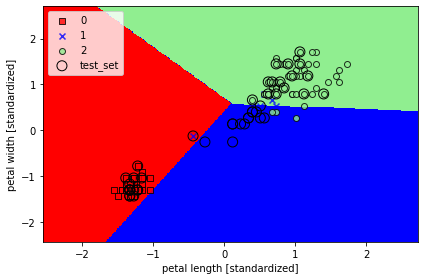

In [11]:
# 퍼셉트론 모델의 결정 경계 그리기

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x=x_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# 행렬 가지고 놀아보기

xxx, yyy = np.meshgrid([0,1],[2,3])
print(xxx)
print(yyy)
print(xxx.ravel())
print(yyy.ravel())
print([xxx.ravel(), yyy.ravel()])
print(np.array([xxx.ravel(), yyy.ravel()]))
print(np.array([xxx.ravel(), yyy.ravel()]).T)
print(np.array([xxx.ravel(), yyy.ravel()]).T.reshape((2,4)))

[[0 1]
 [0 1]]
[[2 2]
 [3 3]]
[0 1 0 1]
[2 2 3 3]
[array([0, 1, 0, 1]), array([2, 2, 3, 3])]
[[0 1 0 1]
 [2 2 3 3]]
[[0 2]
 [1 2]
 [0 3]
 [1 3]]
[[0 2 1 2]
 [0 3 1 3]]
